In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
#load the daataset
data = pd.read_csv("Students Social Media Addiction.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [4]:
data.head(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [ ]:
# Standardize column names
data.columns = (
    data.columns
      .str.strip()                                  # remove leading/trailing spaces
      .str.lower()                                  # lowercase everything
      .str.replace(r'\s+', '_', regex=True)         # replace one-or-more whitespace with _
      .str.replace(r'[^\w]', '', regex=True)        

In [ ]:
#check for and drop missing values
missing_counts = data.isnull().sum()

In [ ]:
#remove duplicates
duplicates = data.duplicated().sum()
data = data.drop_duplicates()

In [ ]:
data.head()

In [ ]:
#new calculated columns
data["weekly_usage_hours"] = data["avg_daily_usage_hours"] * 7
data["addiction_level"] = pd.cut(data["addicted_score"], 
                                 bins=[-1, 3, 6, 10],
                                 labels=["Low", "Medium", "High"]
                                )

In [ ]:
#basic statistics
averages={
    "avg_daily_usage_hours":
    data["avg_daily_usage_hours"].mean(),
    "sleep_hours_per_night":
    data["sleep_hours_per_night"].mean(),
    "addicted_score": data["addicted_score"].mean(),
}
platform_counts = data['most_used_platform'].value_counts()
gender_addiction = data.groupby('gender')['addicted_score'].mean()
academic_addiction = data.groupby('academic_level')['addicted_score'].mean()

In [ ]:
#Correlation matrix
corr_matrix = data[['avg_daily_usage_hours', 'sleep_hours_per_night',
                  'mental_health_score', 'addicted_score']].corr()

In [ ]:
# Save cleaned dataset
cleaned_path = "/FAKE NEWS CLASSIFIER/Cleaned_SocialMediaAddiction.csv"
data.to_csv(cleaned_path, index=False)

# Display results
print("Missing Values per Column:\n", missing_counts, "\n")
print("Number of duplicates dropped:", duplicates, "\n")
print("Basic Averages:\n", pd.Series(averages), "\n")
print("Platform Usage Counts:\n", platform_counts, "\n")
print("Average Addiction Score by Gender:\n", gender_addiction, "\n")
print("Average Addiction Score by Academic Level:\n", academic_addiction, "\n")
print("Correlation Matrix:\n", corr_matrix)

In [ ]:
# Load the cleaned dataset
data = pd.read_csv("/FAKE NEWS CLASSIFIER/Cleaned_SocialMediaAddiction.csv")

# 1. Histogram: Weekly Usage Hours
plt.figure()
plt.hist(data['weekly_usage_hours'].dropna(), bins=10)
plt.title('Distribution of Weekly Usage Hours')
plt.xlabel('Weekly Usage Hours')
plt.ylabel('Frequency')
plt.show()

In [ ]:

# 2. Bar Chart: Addiction Level Counts
plt.figure()
addiction_counts = data['addiction_level'].value_counts().sort_index()
plt.bar(addiction_counts.index.astype(str), addiction_counts.values)
plt.title('Counts of Addiction Levels')
plt.xlabel('Addiction Level')
plt.ylabel('Count')
plt.show()

In [ ]:
# 3. Histogram: Average Daily Usage Hours
plt.figure()
plt.hist(data['avg_daily_usage_hours'], bins=10)
plt.title('Distribution of Average Daily Usage Hours')
plt.xlabel('Avg Daily Usage Hours')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 4. Histogram: Sleep Hours Per Night
plt.figure()
plt.hist(data['sleep_hours_per_night'], bins=10)
plt.title('Distribution of Sleep Hours Per Night')
plt.xlabel('Sleep Hours Per Night')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 5. Histogram: Mental Health Score
plt.figure()
plt.hist(data['mental_health_score'], bins=10)
plt.title('Distribution of Mental Health Scores')
plt.xlabel('Mental Health Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 6. Scatter: Avg Daily Usage vs Addiction Score
plt.figure()
plt.scatter(data['avg_daily_usage_hours'], data['addicted_score'])
plt.title('Avg Daily Usage vs Addiction Score')
plt.xlabel('Avg Daily Usage Hours')
plt.ylabel('Addiction Score')
plt.show()

In [ ]:
# 7. Scatter: Addiction Score vs Mental Health Score
plt.figure()
plt.scatter(data['addicted_score'], data['mental_health_score'])
plt.title('Addiction Score vs Mental Health Score')
plt.xlabel('Addiction Score')
plt.ylabel('Mental Health Score')
plt.show()

In [ ]:
# 8. Bar Chart: Most Used Platform
plt.figure()
platform_counts = data['most_used_platform'].value_counts()
plt.bar(platform_counts.index, platform_counts.values)
plt.title('Most Used Social Media Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

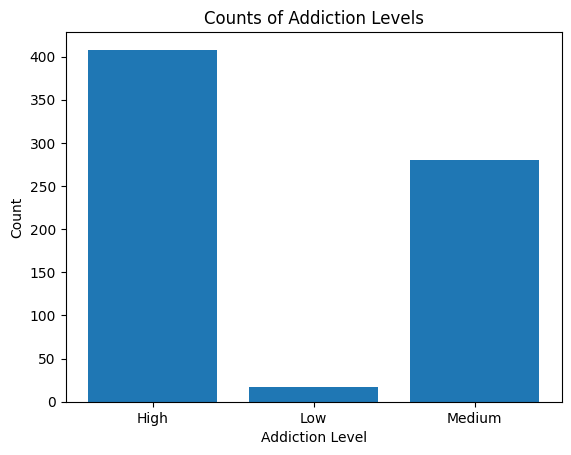

In [18]:

# 2. Bar Chart: Addiction Level Counts
plt.figure()
addiction_counts = data['addiction_level'].value_counts().sort_index()
plt.bar(addiction_counts.index.astype(str), addiction_counts.values)
plt.title('Counts of Addiction Levels')
plt.xlabel('Addiction Level')
plt.ylabel('Count')
plt.show()

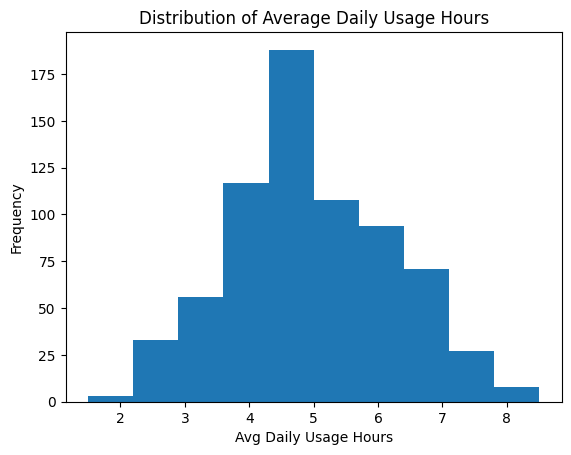

In [19]:
# 3. Histogram: Average Daily Usage Hours
plt.figure()
plt.hist(data['avg_daily_usage_hours'], bins=10)
plt.title('Distribution of Average Daily Usage Hours')
plt.xlabel('Avg Daily Usage Hours')
plt.ylabel('Frequency')
plt.show()

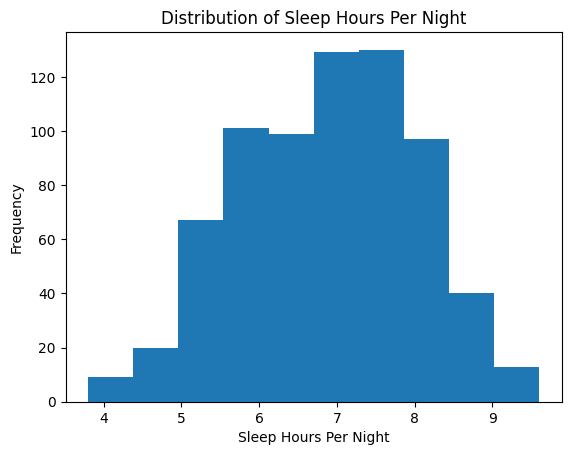

In [20]:
# 4. Histogram: Sleep Hours Per Night
plt.figure()
plt.hist(data['sleep_hours_per_night'], bins=10)
plt.title('Distribution of Sleep Hours Per Night')
plt.xlabel('Sleep Hours Per Night')
plt.ylabel('Frequency')
plt.show()

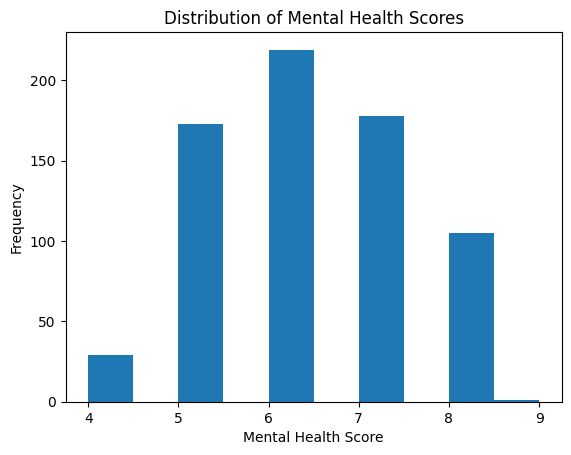

In [21]:
# 5. Histogram: Mental Health Score
plt.figure()
plt.hist(data['mental_health_score'], bins=10)
plt.title('Distribution of Mental Health Scores')
plt.xlabel('Mental Health Score')
plt.ylabel('Frequency')
plt.show()

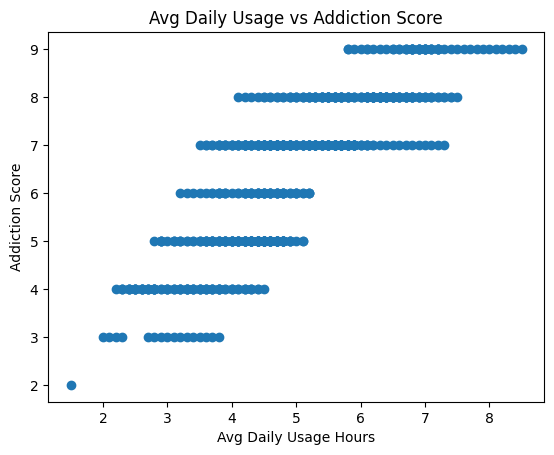

In [24]:
# 6. Scatter: Avg Daily Usage vs Addiction Score
plt.figure()
plt.scatter(data['avg_daily_usage_hours'], data['addicted_score'])
plt.title('Avg Daily Usage vs Addiction Score')
plt.xlabel('Avg Daily Usage Hours')
plt.ylabel('Addiction Score')
plt.show()

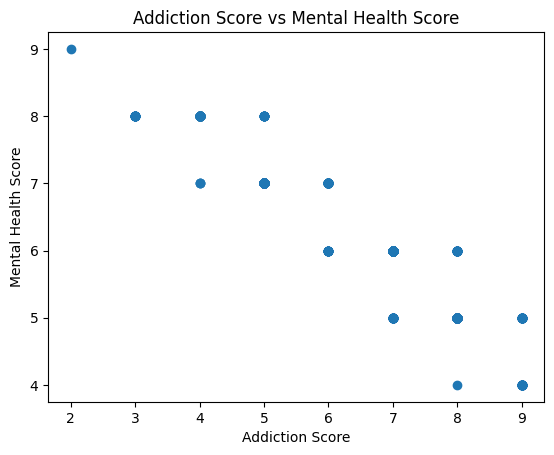

In [26]:
# 7. Scatter: Addiction Score vs Mental Health Score
plt.figure()
plt.scatter(data['addicted_score'], data['mental_health_score'])
plt.title('Addiction Score vs Mental Health Score')
plt.xlabel('Addiction Score')
plt.ylabel('Mental Health Score')
plt.show()

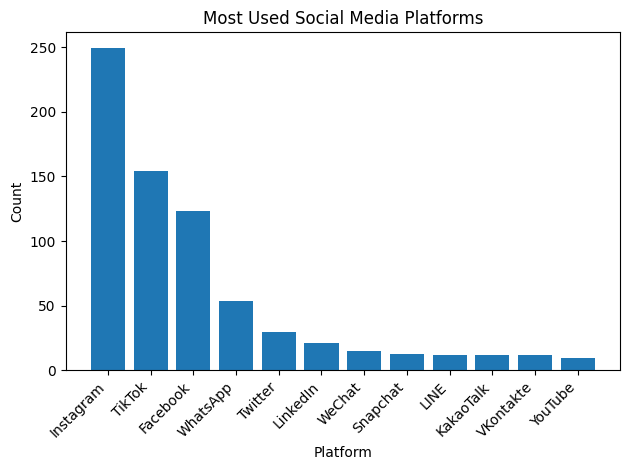

In [27]:
# 8. Bar Chart: Most Used Platform
plt.figure()
platform_counts = data['most_used_platform'].value_counts()
plt.bar(platform_counts.index, platform_counts.values)
plt.title('Most Used Social Media Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()